# SUPER MARKET SALES PROJECT

# OBJECT

A supermarket chain aims to optimize its sales and inventory management by
accurately predicting future sales for each product across its various stores.
Accurate sales predictions enable the supermarket to optimize inventory levels,
plan promotions effectively, and ensure customer satisfaction by minimizing
stock-outs and overstocking situations. As a data science intern, your task is to
develop a machine learning model to predict supermarket sales based on
historical sales data and other relevant factors
​

# Prepare Data

In [1]:
#import libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
len(df)

1000

There are no null values in our data set

In [7]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [8]:
#check null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df = df.drop(["Invoice ID", "Date" ,"Time"], axis=1)

In [10]:
df

Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total      Payment    cogs  \
0         74.69         7  26.1415   548.9715      Ewallet  522.83   
1         15.28         5   3.8200    80.2200         Cash   76.40   
2         46.33         7  16.2155   340.5255  Credit card  324.31   
3         58.22         8  23.2880   489.0480      Ewallet  465.76   
4         86.31         7  30.2085   634.3785      Ewallet  604.17   
..          ...       ...      ...        ...          ...     ...   
995       40.35         1   2.0175    42.3675      Ewallet   40.35   
996       97.38        10  48.6900  1022.4900      Ewallet  973.80   
997       31.84         1   1.5920    33.4320         Cash   31.84   
998       65.82         1   3.2910    69.1110         Cash   65.82   
999       88.34         7  30.9190   649.2990         Cash  618.38   

     gross margin percentage  gross income  Rating  
0                   4.761905       26.1415     9.1  
1                   4.761905        3.8200     9.6  
2                   4.761905       16.2155     7.4  
3                   4.761905       23.2880     8.4  
4                   4.761905       30.2085     5.3  
..                       ...           ...     ...  
995                 4.761905        2.0175     6.2  
996                 4.761905       48.6900     4.4  
997                 4.761905        1.5920     7.7  
998                 4.761905        3.2910     4.1  
999                 4.761905       30.9190     6.6  

[1000 rows x 14 columns]

In [11]:
#cogs
df["gross margin percentage"].unique()

array([4.76190476])

In [12]:
df = df.drop(["gross margin percentage"], axis =1)

In [13]:
df

Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total      Payment    cogs  \
0         74.69         7  26.1415   548.9715      Ewallet  522.83   
1         15.28         5   3.8200    80.2200         Cash   76.40   
2         46.33         7  16.2155   340.5255  Credit card  324.31   
3         58.22         8  23.2880   489.0480      Ewallet  465.76   
4         86.31         7  30.2085   634.3785      Ewallet  604.17   
..          ...       ...      ...        ...          ...     ...   
995       40.35         1   2.0175    42.3675      Ewallet   40.35   
996       97.38        10  48.6900  1022.4900      Ewallet  973.80   
997       31.84         1   1.5920    33.4320         Cash   31.84   
998       65.82         1   3.2910    69.1110         Cash   65.82   
999       88.34         7  30.9190   649.2990         Cash  618.38   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 13 columns]

# DATA VISUALIZATION

In [14]:
print(df.shape)

(1000, 13)


In [16]:
cus_male=df[(df.Gender == 'Male')]
cus_male.shape

(499, 13)

In [18]:
cus_female=df[(df.Gender == 'Female')]
cus_female.shape

(501, 13)

In [19]:
import matplotlib.pyplot as plt

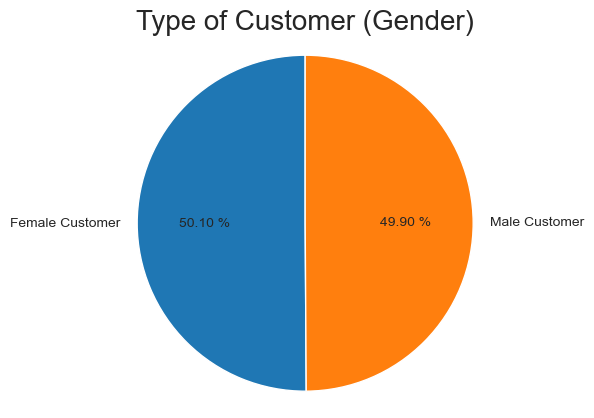

In [52]:
cus_type=[501,499]
labels=['Female Customer','Male Customer']

plt.pie(cus_type,labels=labels,startangle=90,autopct='%.2f %%')
plt.title('Type of Customer (Gender)', fontdict={'fontname': 'Sans Serif', 'fontsize': 20})
plt.axis('equal')
plt.show()


As we can easily observe that Female Customer are more then male customer

# Total bill in each product line

<Axes: xlabel='Total', ylabel='Product line'>

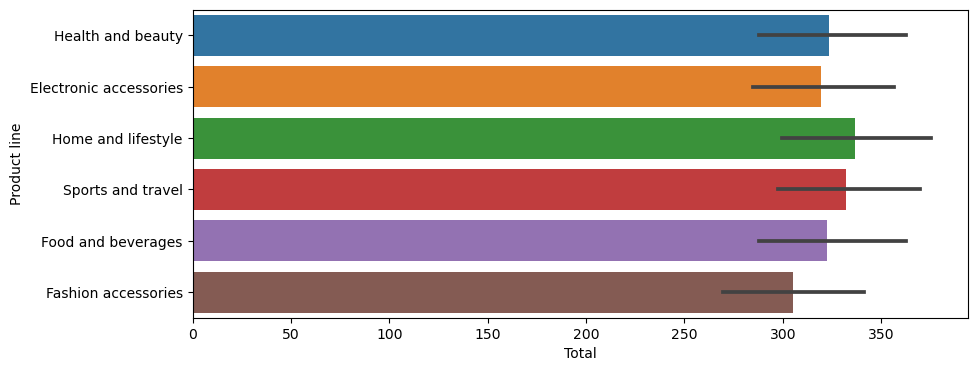

In [21]:
plt.figure(figsize = (10,4))
sns.barplot(x= df["Total"], y=df["Product line"])

By visualization we can see that Home and lifesyleis is having the highest average selling price

# Exploring quantity column

In [27]:
df_quantity = pd.DataFrame(df["Quantity"].value_counts())
df_quantity

Quantity
10       119
1        112
4        109
7        102
5        102
6         98
9         92
2         91
3         90
8         85

<Axes: ylabel='Quantity'>

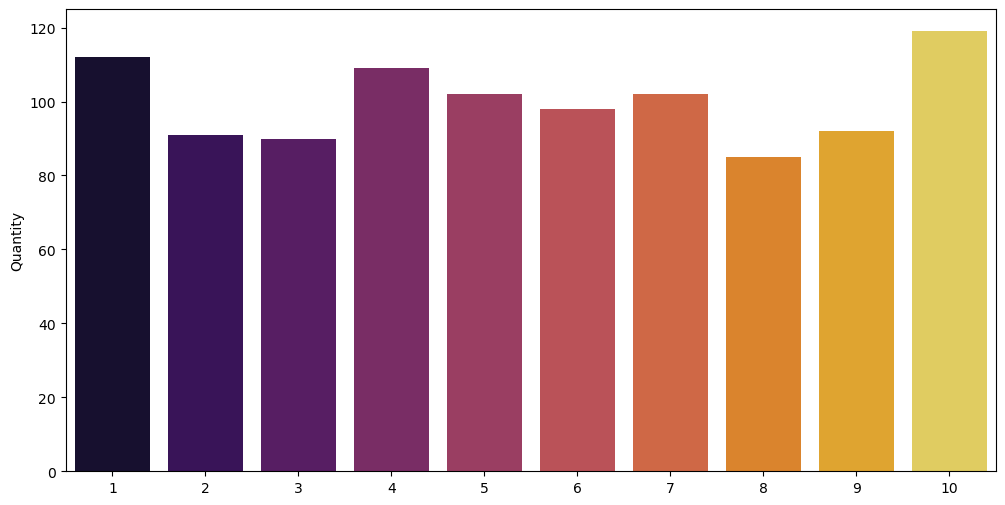

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x= df_quantity.index, y=df_quantity["Quantity"], palette = "inferno")

By observation we can see that 10 quantites sold the most

# Count of Different Types of Customers from Different Cities


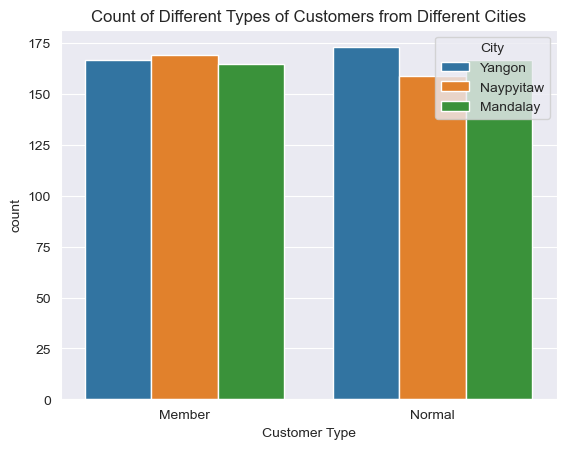

In [33]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['Customer type'],data=df,hue=df['City'])
plt.xlabel('Customer Type')
plt.title('Count of Different Types of Customers from Different Cities')
plt.legend(title='City',loc='upper right')
plt.show()

From above graph we can see that Naypyitaw has the count of member customer, while Yangon has the highest count of normal customer

# Count of Different Types of Payment Methods used by Different Genders


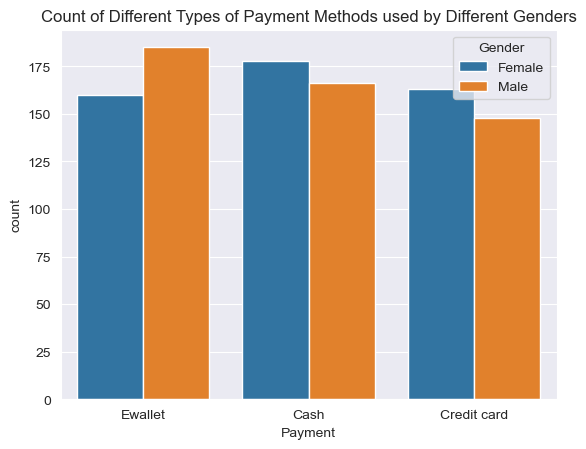

In [38]:
sns.set_style('darkgrid')
ax = sns.countplot(x=df['Payment'],data=df,hue=df['Gender'])
plt.xlabel('Payment')
plt.title('Count of Different Types of Payment Methods used by Different Genders')
plt.show()

From above graph we can see that Ewallet is mostly used by Males and Cash Payment is mostly used by Females.


# Count of Different Gender Visitors from Different Cities


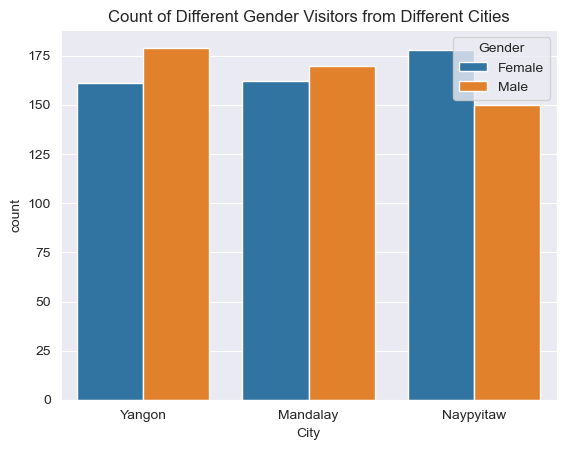

In [43]:
ax = sns.countplot(x=df['City'],data=df,order=df['City'].value_counts().index,hue=df['Gender'])
plt.xlabel('City')
plt.title('Count of Different Gender Visitors from Different Cities')
plt.legend(title='Gender',loc='upper right')
plt.show()

From above graph we can see that mostly male come from Yangon and most female come from Naypyitaw

# Total Amount Spend on Different Product Lines by Different Genders


C:\Users\usman electronics\AppData\Local\Temp\ipykernel_4204\297012610.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(ax.get_xticklabels(),rotation=90)


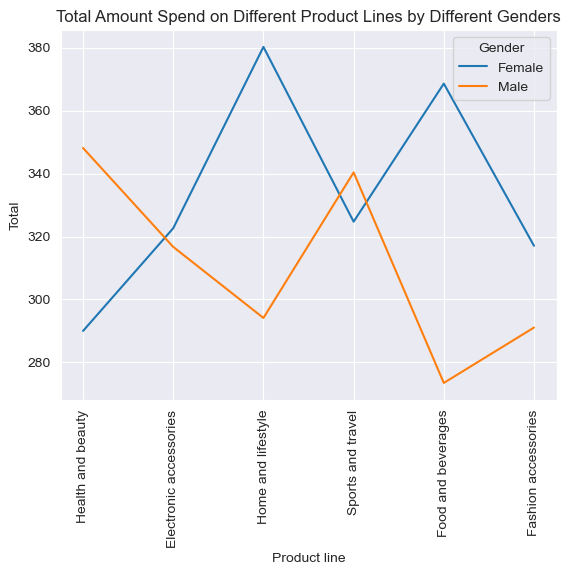

In [51]:
plot = sns.lineplot(x=df['Product line'],y=df['Total'],data=df,hue=df['Gender'],err_style=None)
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Total Amount Spend on Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()